<a href="https://colab.research.google.com/github/Egoago/Onlab/blob/main/%C3%96nlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D regression

##Preparing the data

###Defining the control points

[(0.0, 1.0), (0.0, 1.0)]

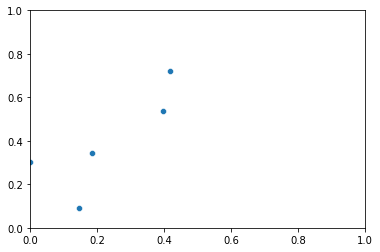

In [80]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(1)
pointNum = 5
points = np.random.random((pointNum,2))
sns.scatterplot(x=points[:,0], y=points[:,1]).set(xlim=(0,1),ylim=(0,1));

In [81]:
import math

def dist(p, points):
  return np.linalg.norm(points-p, axis = 1).min()

print(dist([0.5,0.5], points))

0.11028913462079011


###Generating training data

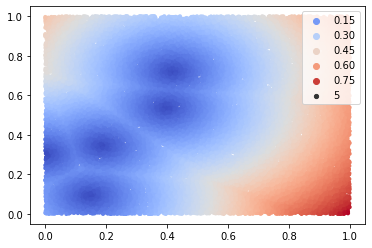

In [82]:
from matplotlib import cm

xNum = 30000
X = np.random.random((xNum,2))
Y = np.empty(xNum)
for i,x in enumerate(X):
  Y[i] = dist(x, points)

sns.scatterplot(x=X[:,0], y=X[:,1], hue = Y, size = 5, linewidth = 0, palette='coolwarm')

###Preprocessing

In [83]:
validSplit = 0.1
testSplit  = 0.1

vCutPoint = int(xNum*(1-validSplit-testSplit))
tCutPoint = int(xNum*(1-testSplit))
trainX = X[0:vCutPoint]
trainY = Y[0:vCutPoint]
validX = X[vCutPoint: tCutPoint]
validY = Y[vCutPoint: tCutPoint]
testX  = X[tCutPoint:]
testY  = Y[tCutPoint:]

##Creating model

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', kernel_initializer='he_normal', input_shape = (2,)),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [85]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer = 'adam',
              loss = 'mse')
es = EarlyStopping(min_delta = 1e-6,
                        patience = 3,
                        verbose = 2,
                        restore_best_weights = True)

##Train

In [86]:
epochs = 50
history = model.fit(trainX,
                    trainY,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (validX, validY),
                    callbacks = [es],
                    epochs = epochs)

Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0338 - val_loss: 0.0022
Epoch 2/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 7/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0012 - val_lo

##Evaluate

0.00026540225371718407

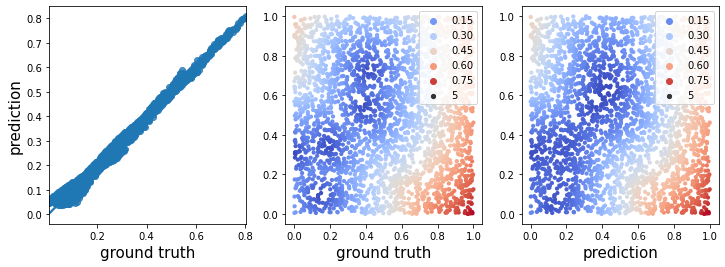

In [87]:
prediction = model.predict(testX, batch_size=32)
plots = []
fig, axs = plt.subplots(ncols = 3,
                        figsize=(12,4))
plots.append(sns.regplot(x = testY, y = prediction, ax=axs[0]))
plots.append(sns.scatterplot(x=testX[:,0], y=testX[:,1], hue = testY, size = 5, linewidth = 0, palette='coolwarm', ax=axs[1]))
plots.append(sns.scatterplot(x=testX[:,0], y=testX[:,1], hue = prediction.reshape(-1), size = 5, linewidth = 0, palette='coolwarm', ax=axs[2]))
plots[0].set_ylabel('prediction', fontsize = 15)
plots[0].set_xlabel('ground truth', fontsize = 15)
plots[1].set_xlabel('ground truth', fontsize = 15)
plots[2].set_xlabel('prediction', fontsize = 15);
model.evaluate(testX, testY, batch_size=32, verbose=0)